In [5]:
import os
import subprocess
import numpy as np
import pandas as pd
import math
import scipy
from scipy.special import factorial
import matplotlib.pyplot as plt
import random

In [ ]:

exp_freq = np.array([5.8, 6.5, 7.3, 7.67, 8.2, 8.6, 9.5, 9.83, 10.33, 10.83])
applied_load = np.array([201.39, 283.122, 446.586, 528.318, 610.05, 691.782, 855.246, 936.978, 1005.246, 1155.246])

val_exp_freq=np.array([4.75, 7, 9.14, 10.6, 11])
val_applied_load=np.array([119.658, 364.854, 773.514, 1086.978, 1236.978])

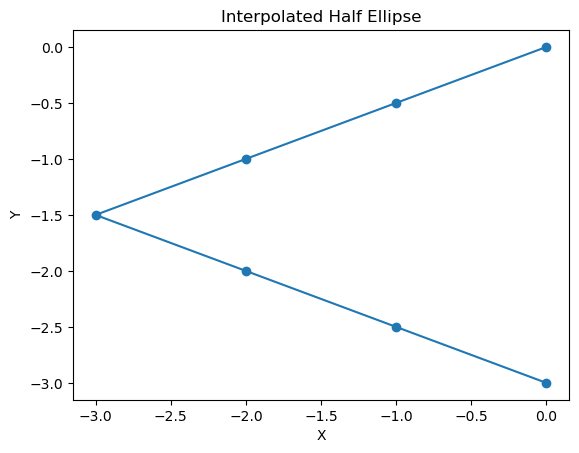

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the starting and ending points of the half ellipse
start_point = (0, 0)
end_point = (0, 3)

# Calculate the intermediate control points
num_points = 7  # Total number of points (including start and end)
num_control_points = num_points - 2  # Number of control points to insert

x_coords = np.zeros(num_points)
y_coords = np.linspace(start_point[1], end_point[1], num_points)

# Calculate the x-coordinates of the control points using a symmetric interpolation
for i in range(4) :
    t = i / 3
    x_coords[i] = 3*t
x_coords[4]=x_coords[2]
x_coords[5]=x_coords[1]
x_coords[6]=x_coords[0]
# Set the x-coordinates of the start and end points
x_coords[0] = start_point[0]
x_coords[-1] = end_point[0]

# Plot the interpolated curve
plt.plot(-x_coords, -y_coords, marker='o')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Interpolated Half Ellipse')
plt.show()


In [3]:
print(x_coords, y_coords)

[0. 1. 2. 3. 2. 1. 0.] [0.  0.5 1.  1.5 2.  2.5 3. ]


[(0.0, 0.0), (1.0, 0.5), (2.0, 1.0), (3.0, 1.5), (2.0, 2.0), (1.0, 2.5), (0.0, 3.0)]


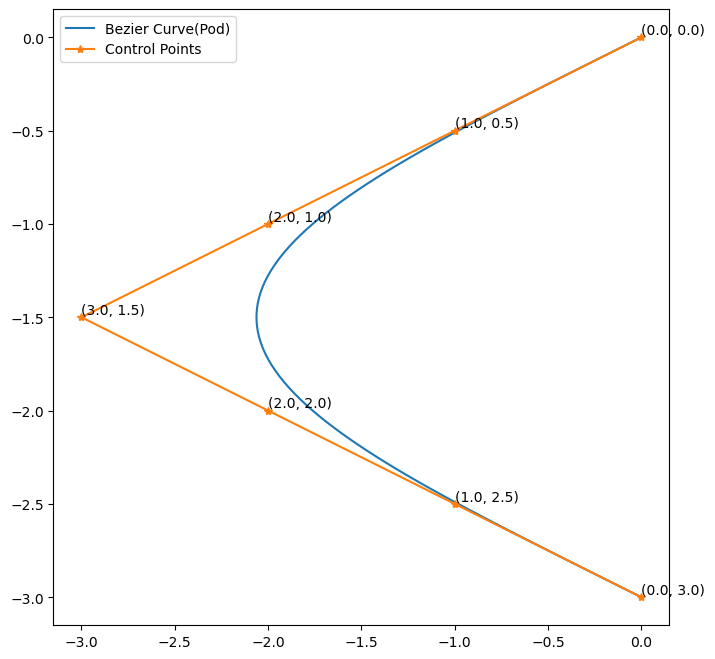

In [4]:
num_points=100
#Just for Visualisation
ts=np.linspace(0,1,num_points)

def fact(n):
    return math.factorial(n)
Pi=[]
for i in range(len(x_coords)):
    Pi.append((x_coords[i],y_coords[i]))
print(Pi)
def Bezier(Pi,n, t):
    P_x, P_y = 0, 0
    i=0
    for P in Pi:
        P_x += P[0] * (fact(n) * pow(1 - t, n - i) * pow(t, i)) / (fact(n - i) * fact(i))
        P_y += P[1] * (fact(n) * pow(1 - t, n - i) * pow(t, i)) / (fact(n - i) * fact(i))
        i=i+1
    return P_x, P_y

curve_x,curve_y=Bezier(Pi,6, ts)

# Increase the figure size
plt.figure(figsize=(8, 8))

# Plot the Bezier curve
plt.plot(-curve_x, -curve_y, label='Bezier Curve(Pod)')

# Plot the control points
plt.plot(-x_coords, -y_coords, marker='*', label='Control Points')

# Set the aspect ratio to 'equal'
plt.gca().set_aspect('equal')

# Add legends
plt.legend()

# Display the point coordinates
for x, y in zip(x_coords, y_coords):
    plt.text(-x, -y, f'({x}, {y})', ha='left', va='bottom')

# Display the plot
plt.show()

In [5]:
p=[]
p[6]=9

IndexError: list assignment index out of range

In [ ]:
import os
import subprocess
import numpy as np
import pandas as pd
import math
import scipy
from scipy.special import factorial
import matplotlib.pyplot as plt
import random

# Compile the C++ code
subprocess.run(["g++", "pressure_drag_mp.cpp", "-o", "pressure_drag_mp"])

#Point to be varied is P1
n_iter = 100    #number of generations to run
pop_size=100    #population size
x_low_lim=0   #lower limit of x coordinate of chosen control point
x_up_lim=3   #upper limit of x 
y_low_lim=0  #lower limit of y
y_up_lim=3    #upper limit of y 
str_len=16      #length of encoded bit string
num_points=80   #number of points on Bezier curve(should match the number in c++ code)
k=10             #k-way tournament selection
mut_prob=0.3    #mutation probability
x_width=x_up_lim-x_low_lim
y_width=y_up_lim-y_low_lim
def drag_compute(file_name):
    # Run the compiled code and capture its output
    result = subprocess.run("./pressure_drag_mp", capture_output=True, text=True)
    # Print the output of the C++ code
    drag=result.stdout
    #print(drag+"\n")
    return drag


#Just for Visualisation
class Control:
    def __init__(self,x,y):
        self.x=x
        self.y=y
Pi=[]
Pi.append(Control(0.0,0.0))
Pi.append(Control(1.0,0.5))
Pi.append(Control(2.0,1.0))
Pi.append(Control(3.0,1.5))
Pi.append(Control(2.0,2.0))
Pi.append(Control(1.0,2.5))
Pi.append(Control(0.0,3.0))
 
P1  = Control(1.0,0.5)

Pv=[Pi[1].y, Pi[2].x, Pi[2].y, Pi[3].x, Pi[3].y, Pi[4].x, Pi[4].y, Pi[5].y]
#Points to be varied

ts=np.linspace(0,1,num_points)


def fact(n):
    return math.factorial(n)

def Bezier(Pi,n, t):
    P_x, P_y = 0, 0
    for i in range(n):
        P_x += (Pi[i].x)* (fact(n) * pow(1 - t, n - i) * pow(t, i)) / (fact(n - i) * fact(i))
        P_y += (Pi[i].y)* (fact(n) * pow(1 - t, n - i) * pow(t, i)) / (fact(n - i) * fact(i))
    return P_x, P_y

#print(Bezier(Pi, 1))
#Bezier_curve=np.vectorize(Bezier)
#curve_x,curve_y=Bezier_curve(P0, P1, P2, P3, t)
#plt.plot(curve_x,curve_y)



In [ ]:
def population(P1_x,P1_y):
    drag=np.zeros(pop_size)
    coord=np.zeros((pop_size,num_points,2))
    min=0
    for i in range(pop_size):
        P1.x=P1_x[i]
        P1.y=P1_y[i]
        Pi[1]=P1
        print(P1.x,P1.y)
        indiv=i+1
        print("gen"+str(gen)+"indiv"+str(indiv))
        coord[i,:,:]=np.transpose(Bezier(Pi, 6, ts))
        # a=plt.figure()
        # a.figwidth=2.5
        # a.figheight=2.5
        # plt.plot(-coord[i,:,0],-coord[i,:,1])
        #plt.show()
        filename="P2.txt"
        Control_file=open(filename,'w')
        Control_file.write(str(P1.x)+"\n"+str(P1.y))
        Control_file.close()
        drag[i]=drag_compute(filename)
        if drag[i]<drag[min]:
            min=i
    return (drag,min,coord)
#(drag,min,coord)=population(P1_x,P1_y)
#print(f'Minimum drag of gen{gen} obtained at P2 coordinates ({P1_x[min]},{P1_y[min]})\nDrag={drag[min]}kN')
#plt.plot(-coord[min,:,0],-coord[min,:,1])



#Sorting individuals based on drag value.The ones offering lowest drag are brought to the beginning
def sort_pod(P1_x,P1_y,drag):
    indices = np.argsort(drag)
    P1_xs=P1_x[indices]
    P1_ys=P1_y[indices]
    drag_s=drag[indices]
    #print(indices)
    #for i in range(num_points):
        #print(f'({P1_xs[i]},{P1_ys[i]}),drag={drag_s[i]}kN')
    return P1_xs,P1_ys
#P1_xs,P1_ys=sort_pod(P1_x,P1_y,drag)

#Binary Encoding
def bin_enc(P1_xs,P1_ys,str_len):
    #Scaling to an 8-bit binary string
    P1_xsb=(P1_xs-x_low_lim)*(2**str_len-1)/x_width
    P1_ysb=(P1_ys-y_low_lim)*(2**str_len-1)/y_width
    P1_xsb=P1_xsb.astype('int32')
    P1_ysb=P1_ysb.astype('int32')
    # print(np.amax(P1_xsb),np.amin(P1_xsb))
    # print(np.amax(P1_ysb),np.amin(P1_ysb))
    binary_repr_v = np.vectorize(np.binary_repr)
    P1_xsb=binary_repr_v(P1_xsb,str_len)
    P1_ysb=binary_repr_v(P1_ysb,str_len)
    # print(len(P1_xsb),len(P1_ysb))
    # print(P1_xsb,P1_ysb)
    return (P1_xsb,P1_ysb)
# (P1_xsb,P1_ysb)=bin_enc(P1_xs,P1_ys,str_len)
# print(type(P1_xsb[0]))

#k way Tournament Selection
def tournament_selection(k):
    parents=np.random.randint(0,pop_size, size=(int(pop_size/2),k))
    parents = np.sort(parents,axis=1)
    parents=parents[:,[0,1]]
    return parents
#ind_new_gen=tournament_selection(5)

#Crossover
#crossover probability of 100 percent
def crossover(P1_xsb,P1_ysb,ind_new_gen,cross_p=1):
    P1_xsbc=P1_xsb
    P1_ysbc=P1_ysb
    #print("before",P1_xsbc[50])
    for i in range(1,int(pop_size/2)):#preserve the best 2
        #print("before",WLsbn[2*i])
        cross_p=random.randint(0,len(P1_xsb[0]))
        #cross_p=10
        parx1=(P1_xsb[ind_new_gen[i,0]])
        parx2=(P1_xsb[ind_new_gen[i,1]])
        P1_xsbc[2*i]=parx1[0:cross_p]+parx2[cross_p:]
        P1_xsbc[2*i+1]=parx2[0:cross_p]+parx1[cross_p:]
        pary1=(P1_ysb[ind_new_gen[i,0]])
        pary2=(P1_ysb[ind_new_gen[i,1]])
        P1_ysbc[2*i]=pary1[:cross_p]+pary2[cross_p:]
        P1_ysbc[2*i+1]=pary2[:cross_p]+pary1[cross_p:]
        #print("after",WLsbn[2*1])
    return (P1_xsbc, P1_ysbc)
#P1_xsbc, P1_ysbc=crossover(P1_xsb,P1_ysb,ind_new_gen,1)
#print("after",P1_xsbc[50])

#Mutation
def mutation(P1_xsbc, P1_ysbc,mut_prob):
    mut_child=np.random.randint(2,pop_size,size=int(pop_size*mut_prob))#preserve the best 2
    #print(mut_child)
    P1_xsbcm=P1_xsbc
    P1_ysbcm=P1_ysbc
    for i in range(0,int(pop_size*mut_prob)):
        mut_p=random.randint(0,len(P1_xsbc[0])-1)
        #print(mut_p)
        str1=P1_xsbc[mut_child[i]]
        #print(len(str1))
        str2=P1_ysbc[mut_child[i]]
        #print("before",P1_xsbcm[mut_child[i]])
        if str1[mut_p]=='0':
            str1=str1[:mut_p]+'1'+str1[mut_p+1:]
        else:
            str1=str1[:mut_p]+'0'+str1[mut_p+1:]
        if str2[mut_p]=='0':
            str2=str2[:mut_p]+'1'+str1[mut_p+1:]
        else:
            str2=str2[:mut_p]+'0'+str1[mut_p+1:]
        P1_xsbcm[mut_child[i]]=str1
        P1_ysbcm[mut_child[i]]=str2
        #print("after",P1_xsbcm[mut_child[i]])
    return (P1_xsbcm, P1_ysbcm)
#P1_xsbcm, P1_ysbcm=mutation(P1_xsbc, P1_ysbc,0.2)
        

#Decoding back to coordinates
def decode(P1_xsbcm, P1_ysbcm):
    def convert(str1,str2):
        ex=int(str1,2)
        ey=int(str2,2)
        return (ex,ey)
    decode=np.vectorize(convert)
    (P1_xn, P1_yn)=decode(P1_xsbcm, P1_ysbcm)
    P1_xn=(P1_xn*x_width)/(2**str_len-1)+x_low_lim
    P1_yn=(P1_yn*y_width)/(2**str_len-1)+y_low_lim
    return (P1_xn, P1_yn)
#(P1_xn, P1_yn)=decode(P1_xsbcm, P1_ysbcm)
#print(P1_xn, P1_yn)

#Convergence Condition/Loop
P1_x=x_low_lim+(np.random.rand(pop_size))*x_width
P1_y=y_low_lim+(np.random.rand(pop_size))*y_width
min_drag=np.zeros((n_iter,3))
for gen in range(1,n_iter+1):
    print("gen+"+str(gen))
    (drag,min,coord)=population(P1_x,P1_y)
    min_drag[gen-1,0]=P1_x[min]
    min_drag[gen-1,1]=P1_y[min]
    min_drag[gen-1,2]=drag[min]
    if gen==n_iter:
        break
    (P1_xs,P1_ys)=sort_pod(P1_x,P1_y,drag)
    (P1_xsb,P1_ysb)=bin_enc(P1_xs,P1_ys,str_len)
    ind_new_gen=tournament_selection(k)
    (P1_xsbc, P1_ysbc)=crossover(P1_xsb,P1_ysb,ind_new_gen,1)
    (P1_xsbcm, P1_ysbcm)=mutation(P1_xsbc, P1_ysbc,mut_prob)
    (P1_xn, P1_yn)=decode(P1_xsbcm, P1_ysbcm)
    (P1_x,P1_y)=(P1_xn, P1_yn)
print(min_drag)
min=np.argmin(min_drag[:,2])
print(f'Convergence obtained at gen{min+1} obtained at P2 coordinates ({min_drag[min,0]},{min_drag[min,1]})\nDrag={min_drag[min,2]}kN')

#saving drag(fitness function) values excel file for plotting
df = pd.DataFrame (min_drag[:,2])
filepath = 'C:/Users/91944/Downloads/GA Shape Optimization/Opti Project/fitness_2.xlsx'
df.to_excel(filepath, index=False)
